In [277]:
import numpy as np
import matplotlib.pyplot as plt
from Engines.optimisation_engine import get_wing_performance
import pandas as pd
import pygad
from config import (
    Performance_Data_Path,
    Planform_Coordinate_File,
    Station_1_Airfoil_Coordinate_File,
    Station_2_Airfoil_Coordinate_File,
    Station_3_Airfoil_Coordinate_File,
    Station_4_Airfoil_Coordinate_File,
    Station_5_Airfoil_Coordinate_File,
    Station_6_Airfoil_Coordinate_File,
    V_Free_Stream,
    Free_Stream_Speed_Base,
    Lift_Over_Drag_Base

)


# Utility Functions

In [278]:
def generate_performance_plots(PerformanceFilePath):

    optimised_lift_to_drag_performance = np.loadtxt(PerformanceFilePath)
    plt.plot(
        V_Free_Stream,
        optimised_lift_to_drag_performance,
        label="Optimised",
        marker="o",
    )
    plt.plot(
        Free_Stream_Speed_Base,
        Lift_Over_Drag_Base,
        label="Baseline",
        marker="o",
    )
    plt.xlabel("Free stream speed [km/h]")
    plt.ylabel("Lift-to-drag ratio")
    plt.legend()
    plt.grid()
    plt.show(block=False)


def generate_and_dump_planform_plots(
    PlanformFilePath: str,
):

    wingspanincrements = np.insert(np.loadtxt(PlanformFilePath).T[2], 0, 0)
    l2 = np.cumsum(wingspanincrements)
    chord = np.insert(
        np.loadtxt(PlanformFilePath).T[0],
        5,
        np.loadtxt(PlanformFilePath).T[1][-1],
    )
    plt.plot(l2, chord, color="darkblue")
    plt.plot(-l2, chord, color="darkblue")
    plt.plot(
        [np.max(l2) for i in range(0, 50)],
        np.linspace(0, np.min(chord), 50),
        color="darkblue",
    )
    plt.plot(
        [np.min(-l2) for i in range(0, 50)],
        np.linspace(0, np.min(chord), 50),
        color="darkblue",
    )
    plt.plot(
        np.linspace(np.min(-l2), np.max(l2), 50),
        [0 for i in range(0, 50)],
        color="darkblue",
    )
    plt.axis("equal")
    plt.grid()
    plt.show(block=False)

    return


def generate_and_dump_airfoil_plot(AirfoilFilePath: str):
    plt.figure()
    plt.plot(np.loadtxt(AirfoilFilePath).T[0], np.loadtxt(AirfoilFilePath).T[1])
    plt.grid()
    plt.axis("equal")
    plt.xlabel("x/c")
    plt.ylabel("y/c")
    plt.title(AirfoilFilePath)
    plt.show(block=False)
    plt.clf()

# Load Optimisation Results

In [279]:
# # Saving the GA instance.
# filename = "Data\OptimisationData\genetic"  # The filename to which the instance is saved. The name is without extension.

# # Loading the saved GA instance.
# loaded_ga_instance = pygad.load(filename=filename)
# loaded_ga_instance.plot_fitness()

# Dump Best Performing Models

In [280]:

# get_wing_performance(


# ga_instance=loaded_ga_instance,


# solution=loaded_ga_instance.best_solution()[0],


# solution_idx=loaded_ga_instance.best_solution()[1])



# Generate Planform Plots

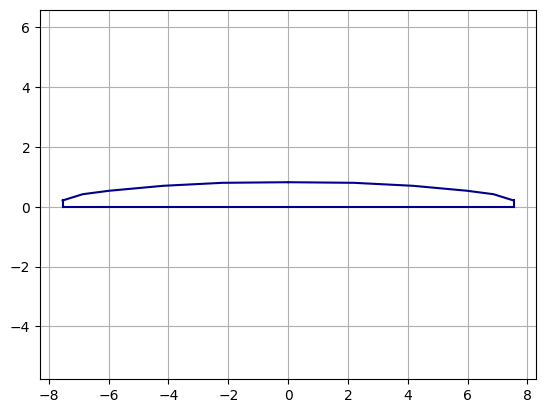

In [281]:
generate_and_dump_planform_plots(
    PlanformFilePath=Planform_Coordinate_File,
)

# Generate Airfoil Plots

In [499]:
Plot_Optimal = True

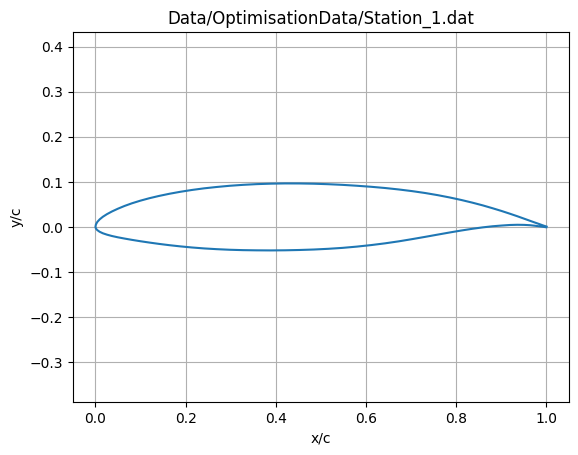

<Figure size 640x480 with 0 Axes>

In [500]:
if Plot_Optimal:

    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_1.dat"
    ) 

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_1_Airfoil_Coordinate_File)

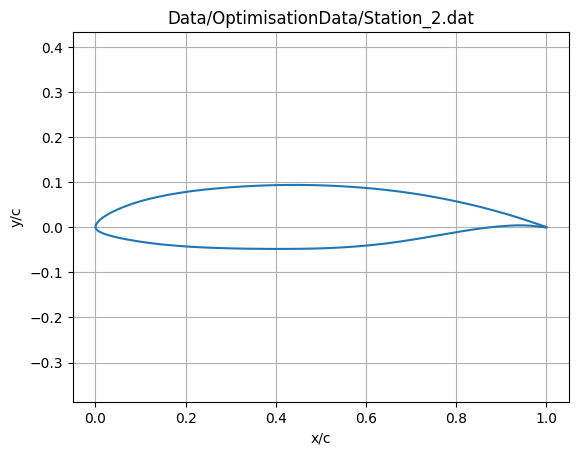

<Figure size 640x480 with 0 Axes>

In [501]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_2.dat"
    )

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_2_Airfoil_Coordinate_File)

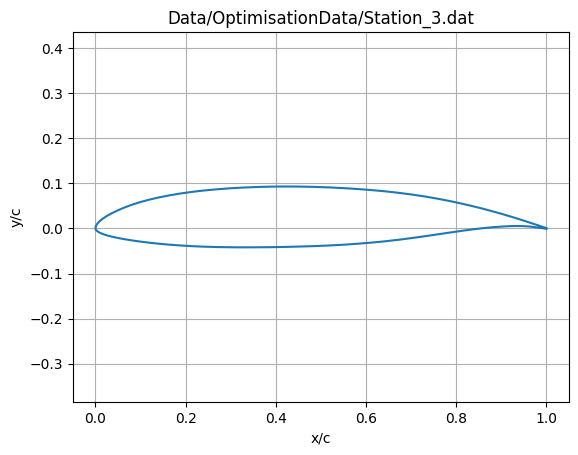

<Figure size 640x480 with 0 Axes>

In [502]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_3.dat"
    )

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_3_Airfoil_Coordinate_File)

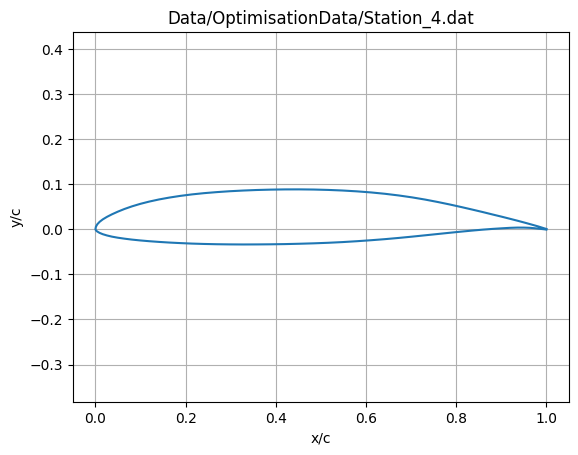

<Figure size 640x480 with 0 Axes>

In [503]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_4.dat"
    )  

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_4_Airfoil_Coordinate_File)

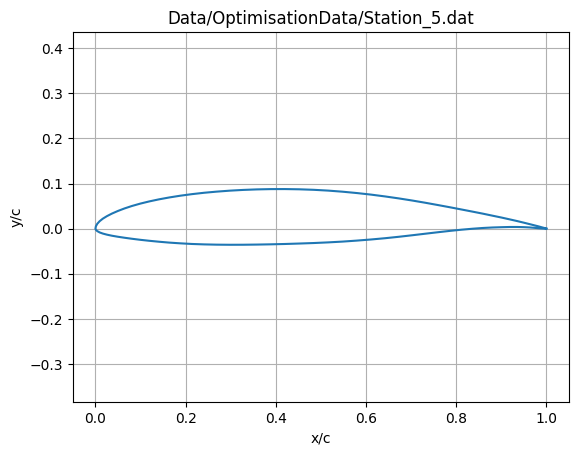

<Figure size 640x480 with 0 Axes>

In [504]:
if Plot_Optimal:

    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_5.dat"
    )
else:
    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_5_Airfoil_Coordinate_File)

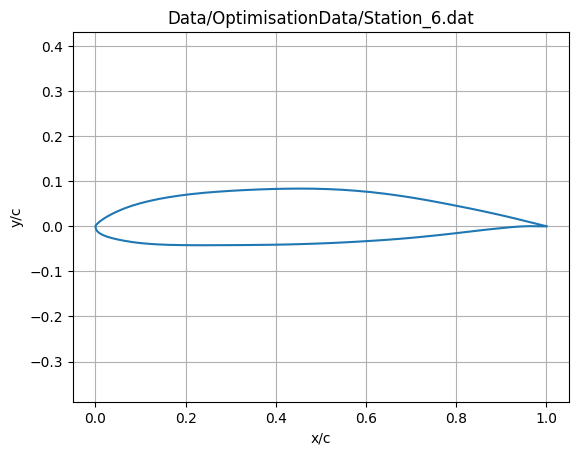

<Figure size 640x480 with 0 Axes>

In [505]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_6.dat"
    )
else:
    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_6_Airfoil_Coordinate_File)

# Generate Performance Plots

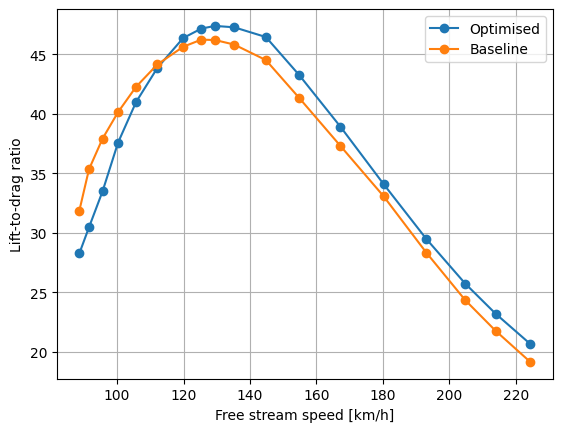

In [506]:
generate_performance_plots(PerformanceFilePath=Performance_Data_Path)

# Adhoc

In [507]:
def airfoil_quality_penalty(X:np.array, Y: np.array, weight = 1e3):
        
    
        x_upper = X[0 : int(len(X) / 2 + 1)]
        y_upper = Y[0 : int(len(X) / 2 + 1)]

        x_lower = X[int(len(X) / 2) :]
        y_lower = Y[int(len(X) / 2) :]

        """# Determine Critical Curvature Points"""

        grad_top = []
        grad_bot = []
        top_grad_change = []
        bot_grad_change = []

        for i in range(1, len(x_upper)):
            grad_top.append(((y_upper[i - 1] - y_upper[i]) / (x_upper[i - 1] - x_upper[i])))
            grad_bot.append(((y_lower[i - 1] - y_lower[i]) / (x_lower[i - 1] - x_lower[i])))

        for i in range(1, len(grad_top)):
            if ((grad_top[i] < 0) & (grad_top[i - 1] > 0)) or (
                (grad_top[i] > 0) & (grad_top[i - 1] < 0)
            ):
                top_grad_change.append(i)
            if ((grad_bot[i] < 0) & (grad_bot[i - 1] > 0)) or (
                (grad_bot[i] > 0) & (grad_bot[i - 1] < 0)
            ):
                bot_grad_change.append(i)

        return grad_top, grad_bot, top_grad_change, bot_grad_change

In [546]:
# X = np.loadtxt(Station_1_Airfoil_Coordinate_File).T[0]
# Y = np.loadtxt(Station_1_Airfoil_Coordinate_File).T[1]

X = np.loadtxt("Data/OptimisationData/Station_6.dat").T[0]
Y = np.loadtxt("Data/OptimisationData/Station_6.dat").T[1]


In [547]:
grad_top, grad_bot, top_grad_change, bot_grad_change = airfoil_quality_penalty(X,
                        Y, 
                        weight = 1e3)

In [548]:
x_upper = X[0 : int(len(X) / 2 + 1)]
y_upper = Y[0 : int(len(X) / 2 + 1)]

x_lower = X[int(len(X) / 2) :]
y_lower = Y[int(len(X) / 2) :]

In [549]:
bot_grad_change

[16, 43, 46, 47, 48]

In [550]:
top_grad_change

[26]

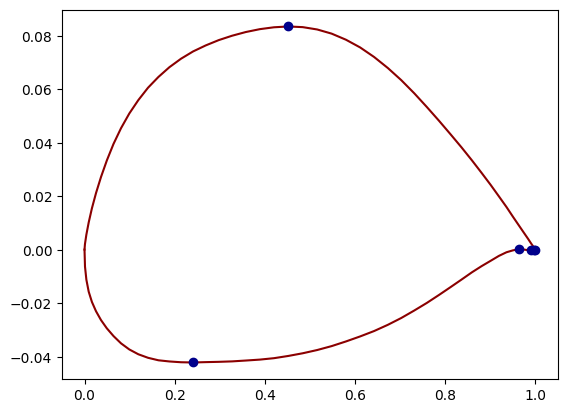

In [551]:
# Plot top and bottom critical points

plt.plot(x_upper,y_upper, c="darkred", label="Sampled")
plt.plot(x_lower,y_lower, c="darkred")
for tp in top_grad_change:
    plt.plot(x_upper[tp],y_upper[tp], "o", c="darkblue")
for bp in bot_grad_change:
    plt.plot(x_lower[bp],y_lower[bp], "o", c="darkblue")
# plt.axis("equal")
plt.show()

# Smooth Airfoil

In [514]:
from aerosandbox.geometry.airfoil.airfoil_families import get_kulfan_parameters, get_kulfan_coordinates

In [515]:
for i in range(1,7):
    X = np.loadtxt(F"Data/OptimisationData/Station_{i}.dat").T[0]
    Y = np.loadtxt(F"Data/OptimisationData/Station_{i}.dat").T[1]
    stack = np.vstack([X,Y]).T
    wte =get_kulfan_parameters(coordinates=stack)
    crds = get_kulfan_coordinates(lower_weights=wte["lower_weights"], 
                              upper_weights=wte["upper_weights"], 
                              TE_thickness=wte["TE_thickness"], 
                              leading_edge_weight=wte["leading_edge_weight"],
                              n_points_per_side=100)
    np.savetxt(X=crds,fname=F"/home/megi/Station_{i}_Smooth.dat")

# Run Comparative Analysis (Ad-hoc)

In [516]:
import pyfoil

In [537]:
st_6_opt  = pyfoil.Airfoil.import_from_dat("/home/megi/Station_6_Smooth.dat").resample(170)
st_6_base = pyfoil.Airfoil.import_from_dat("/home/megi/Downloads/Airfoil_Station_6_smooth.dat").resample(170)

In [538]:
st_6_opt

In [539]:
st_6_base

In [540]:
aoa_start = -25
aoa_stop=25
steps = 30
df_6_opt = st_6_opt.xfoil_polar(aoa_start=aoa_start, aoa_end=aoa_stop, steps=steps, degree=True)
df_6_base = st_6_base.xfoil_polar(aoa_start=aoa_start, aoa_end=aoa_stop, steps=steps, degree=True)

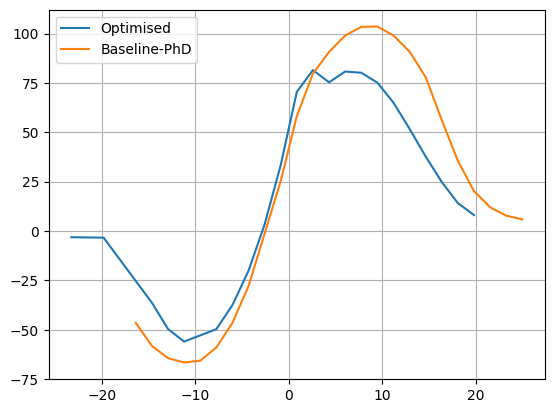

In [541]:
plt.plot(df_6_opt["aoa"], df_6_opt["cl"]/df_6_opt["cd"], label="Optimised")
plt.plot(df_6_base["aoa"], df_6_base["cl"]/df_6_base["cd"], label="Baseline-PhD")
plt.grid()
plt.legend()
plt.show()

In [542]:
import pyxfoil

In [543]:
# Import Dependencies
from pyxfoil import Xfoil, set_workdir, set_xfoilexe
set_workdir('.') # Sets the working directory for pyxfoil
set_xfoilexe('/usr/bin/xfoil') # Sets the path of the xfoil execut/able.

In [544]:
# Creates Xfoil object from reading dat file.
xfoil = Xfoil('Station_2_Smooth')
xfoil.points_from_dat('/home/megi/Station_2_Smooth.dat')
xfoil.set_ppar(180)

In [545]:
# Runs xfoil for the following parameters
al = [-2.0]
mach = 0.1
re = 100000.0
for ali in al:
    rescase = xfoil.run_result(ali, mach=mach, re=re)


  XFOIL Version 6.99
  Copyright (C) 2000   Mark Drela, Harold Youngren

  This software comes with ABSOLUTELY NO WARRANTY,
    subject to the GNU General Public License.

  Caveat computor

 File  xfoil.def  not found

   QUIT    Exit program

  .OPER    Direct operating point(s)
  .MDES    Complex mapping design routine
  .QDES    Surface speed design routine
  .GDES    Geometry design routine

   SAVE f  Write airfoil to labeled coordinate file
   PSAV f  Write airfoil to plain coordinate file
   ISAV f  Write airfoil to ISES coordinate file
   MSAV f  Write airfoil to MSES coordinate file
   REVE    Reverse written-airfoil node ordering
   DELI i  Change written-airfoil file delimiters

   LOAD f  Read buffer airfoil from coordinate file
   NACA i  Set NACA 4,5-digit airfoil and buffer airfoil
   INTE    Set buffer airfoil by interpolating two airfoils
   NORM    Buffer airfoil normalization toggle
   HALF    Halve the number of points in buffer airfoil
   XYCM rr Change CM refere

FileNotFoundError: [Errno 2] No such file or directory: './1.000000000000000000e+00_6.041961298120790413e-04_197_-2_0.1_100000.res'

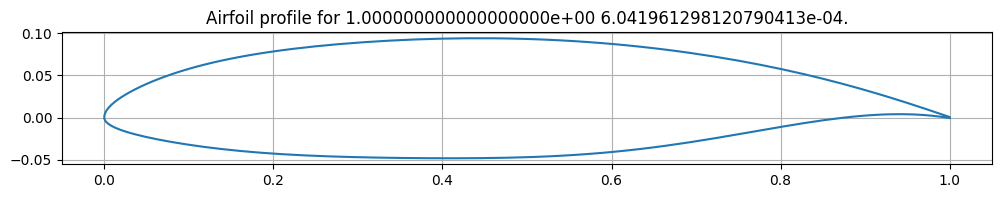

In [ ]:
# Plots xfoil airfoil profile
ax1 = xfoil.plot_profile(ls='-')